## **Bayesian Network**
The conditional probability tables for the below bayesian network are given below.

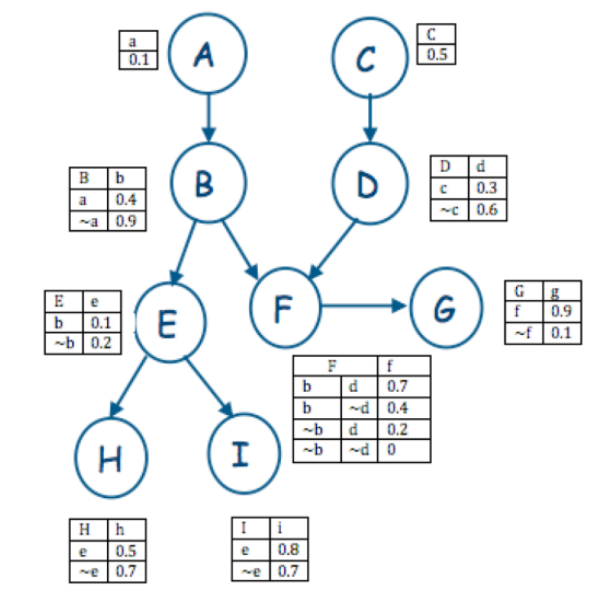

# **Installing and Importing the pomegranate library**

In [15]:
!pip install pomegranate==v0.14.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 34.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for pomegranate: filename=pomegranate-0.14.9-cp310-cp310-linux_x86_64.whl size=18331382 sha256=2dd6e35a8ae1a5e214cd1016bbbd4f2fd6fd304e37bbc3be92b7fea45ccd266c
  Stored in directory: /root/.cache/pip/wheels/14/e7/b2/189a2d351ac4ae073cfa17ce9d56936d59af5712a18028fc31
Successfully built pomegranate
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.4
    Uninstalling Cython-3.0.4:
      Successfully uninstalled Cython-3.0.4
  Attempting uninstall: pomegranate
    Found existing installation: pomegranate 1.0.3
    Uninstalling pomegranate-1.0.3:
      Successfully uninstalled pomegranate-1.0.3


In [1]:
import math
from pomegranate import *

**A and C are the base nodes so for them we have the absolute probabilities.**

In [2]:
a = DiscreteDistribution({'1': 0.1, '0': 0.9})
c = DiscreteDistribution({'1': 0.5, '0': 0.5})

**Creating Conditional Probability Table for Node B,D,E,F,G,H,I**

In [3]:
b = ConditionalProbabilityTable(
        [[ '0', '0', 0.1 ],
         [ '0', '1', 0.9 ],
         [ '1', '0', 0.6 ],
         [ '1', '1', 0.4 ]],[a])

d = ConditionalProbabilityTable(
        [[ '0', '0', 0.4 ],
         [ '0', '1', 0.6 ],
         [ '1', '0', 0.7 ],
         [ '1', '1', 0.3 ]],[c])

e = ConditionalProbabilityTable(
        [[ '0', '0', 0.8 ],
         [ '0', '1', 0.2 ],
         [ '1', '0', 0.9 ],
         [ '1', '1', 0.1 ]],[b])

h = ConditionalProbabilityTable(
        [[ '0', '0', 0.3 ],
         [ '0', '1', 0.7 ],
         [ '1', '0', 0.5 ],
         [ '1', '1', 0.5 ]],[e])

i = ConditionalProbabilityTable(
        [[ '0', '0', 0.3 ],
         [ '0', '1', 0.7 ],
         [ '1', '0', 0.2 ],
         [ '1', '1', 0.8 ]],[e])

f = ConditionalProbabilityTable(
        [[ '0', '0', '1', 0.0 ],
         [ '0', '1', '1', 0.2 ],
         [ '1', '0', '1', 0.4 ],
         [ '1', '1', '1', 0.7 ],
         [ '0', '0', '0', 1.0 ],
         [ '0', '1', '0', 0.8 ],
         [ '1', '0', '0', 0.6 ],
         [ '1', '1', '0', 0.3 ]],[b,d])

g = ConditionalProbabilityTable(
        [[ '0', '0', 0.9 ],
         [ '0', '1', 0.1 ],
         [ '1', '0', 0.1 ],
         [ '1', '1', 0.9 ]],[f])

**Creating States**

In [4]:
A = State(a, name="A")
B = State(b, name="B")
C = State(c, name="C")
D = State(d, name="D")
E = State(e, name="E")
F = State(f, name="F")
G = State(g, name="G")
H = State(h, name="H")
I = State(i, name="I")

**Create Network**

In [5]:
# Create the Bayesian network object
model = BayesianNetwork("Example1")

# Add the states to the network
model.add_states(A, B, C, D, E, F, G, H, I)

**Add edges to the model. The edges represent which states are parents of which other states.**

In [6]:
model.add_edge(A, B)
model.add_edge(B, E)
model.add_edge(B, F)
model.add_edge(C, D)
model.add_edge(D, F)
model.add_edge(E, H)
model.add_edge(E, I)
model.add_edge(F, G)

**Model must be baked to finalize the internals.**

In [7]:
model.bake()

# **Calculating the Probabilities**

In [8]:
# P(I|C)
model.predict_proba([{'C': '1'}])[0][8].parameters[0]['1']

0.7114999999999999

In [9]:
# P (E|~D)
model.predict_proba([{'D': '0'}])[0][4].parameters[0]['1']

0.11500000000000059

In [10]:
# P(G|B,~D)
model.predict_proba([{'B': '1', 'D': '0'}])[0][6].parameters[0]['1']

0.42